In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten 
from keras.models import Sequential
from keras.preprocessing import image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# zoom range less than 1 indicates that the image will be zoomed in x% in 0.x 
# value we assign, While zooms out if it's greater than 1.0
# Shear range is the distortion in a particular axis: augmenting an image
train_datagen = image.ImageDataGenerator(rescale = 1/255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2)

In [4]:
train_data = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/covid_pred/main/datasets/datasets/train', target_size = (256, 256), batch_size = 16, class_mode = "binary")


Found 676 images belonging to 2 classes.


In [5]:
#Looking at different classes in the folder
train_data.class_indices

{'negative': 0, 'positive': 1}

In [6]:
test_datagen = image.ImageDataGenerator(rescale = 1/255, horizontal_flip = True, zoom_range = 0.2, shear_range = 0.2)

In [7]:
test_data=test_datagen.flow_from_directory(directory='/content/drive/MyDrive/covid_pred/main/datasets/datasets/test',target_size = (256,256), batch_size = 16, class_mode = "binary")

Found 408 images belonging to 2 classes.


In [11]:
test_data.class_indices

{'negative': 0, 'positive': 1}

In [12]:
import seaborn as sns
from pandas.plotting import scatter_matrix
import sklearn

#train_data = pd.DataFrame(np.concatenate([[0]*len('/content/drive/MyDrive/covid_pred/main/datasets/datasets/train/negative') , [1] *  len('/content/drive/MyDrive/covid_pred/main/datasets/datasets/train/positive')]),columns=["class"])


In [13]:
#sns.countplot(train_data['class'],data=train_data)

In [14]:
#Creating the CNN Model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (256, 256, 3)))

#Layer 1
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

#Layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

#Layer 3
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.50))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['acc'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

In [17]:
main = model.fit_generator(train_data, steps_per_epoch = 8, epochs = 20, validation_steps = 2, validation_data = test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
8/8 [==============================] - 56s 7s/step - loss: 0.5085 - acc: 0.7969 - val_loss: 0.6547 - val_acc: 0.7812
Epoch 2/20
8/8 [==============================] - 59s 7s/step - loss: 0.5159 - acc: 0.7891 - val_loss: 0.5847 - val_acc: 0.7812
Epoch 3/20
8/8 [==============================] - 51s 6s/step - loss: 0.5157 - acc: 0.8017 - val_loss: 0.6338 - val_acc: 0.8125
Epoch 4/20
8/8 [==============================] - 55s 7s/step - loss: 0.5067 - acc: 0.8125 - val_loss: 0.4479 - val_acc: 0.7188
Epoch 5/20
8/8 [==============================] - 55s 7s/step - loss: 0.4587 - acc: 0.8047 - val_loss: 0.6083 - val_acc: 0.6562
Epoch 6/20
8/8 [==============================] - 54s 7s/step - loss: 0.4311 - acc: 0.8047 - val_loss: 0.6170 - val_acc: 0.6562
Epoch 7/20
8/8 [==============================] - 48s 6s/step - loss: 0.3641 - acc: 0.8276 - val_loss: 0.5454 - val_acc: 0.7188
Epoch 8/20
8/8 [==============================] - 52s 7s/step - loss: 0.3566 - acc: 0.7891 - val_loss: 0

In [18]:
p = main.history
p.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [20]:
'''
losstrain = main.history['loss']
lossval = main.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, losstrain, "r", label = 'Training Loss vs Iterations') 
plt.plot(epochs, lossval, "k", label = 'Validation Loss vs Iterations')
plt.title('Training and validation Model')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

'\nlosstrain = main.history[\'loss\']\nlossval = main.history[\'val_loss\']\nepochs = range(1,16)\nplt.plot(epochs, losstrain, "g", label = \'Training Loss Graph vs Iterations\') \nplt.plot(epochs, lossval, "r", label = \'Validation Loss Graph vs Iterations\')\nplt.title(\'Training and validation Model Result\')\nplt.xlabel(\'ITERATIONS\')\nplt.ylabel(\'LOSS\')\nplt.legend()\nplt.show()\n'

In [21]:
#Loading the image that we want to predict
path="/content/drive/MyDrive/covid_pred/main/datasets/datasets/test/negative/00001445_000.png"
img=image.load_img(path, target_size=(256,256))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 256, 256, 3)

In [22]:
#Predicting the result
# 0 : Negative
# 1 : Positive

pred = model.predict(img)
res = np.round(pred).astype(int)

In [23]:
print(pred)
print(res)

[[0.40044424]]
[[0]]


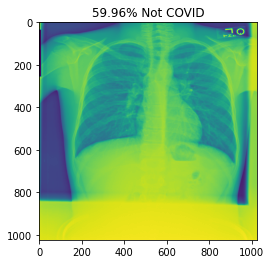

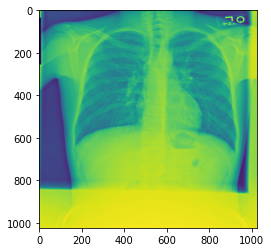

In [35]:
import cv2
from google.colab.patches import cv2_imshow


path="/content/drive/MyDrive/covid_pred/main/datasets/datasets/test/negative/00001445_000.png"
img=image.load_img(path, target_size=(256,256))
img=image.img_to_array(img)/255
img=np.array([img])

#Plotting the result along with the percentage of its prediction
if pred > 0.5:
  plt.title('%.2f' % (pred*100) + '% COVID')
else:
  plt.title('%.2f' % ((1-pred)*100) + '% Not COVID')

import matplotlib.image as mpimg
for img in os.listdir("/content/drive/MyDrive/covid_pred/main/datasets/datasets/test"): 
  image = mpimg.imread(path)
  plt.imshow(image)
  plt.show()
#cv2_imshow('/content/drive/MyDrive/covid_pred/main/datasets/datasets/test/negative/00001445_000.png')
#cv2.show()

In [47]:
# Converting to Binary classes
pred_bin = np.argmax(pred, axis=1)
test_bin = np.argmax('/content/drive/MyDrive/covid_pred/main/datasets/datasets/test', axis=0)

#Reshaping test binary
test_new  = test_bin.reshape(-1,1)

In [57]:
'''

from sklearn.metrics import confusion_matrix, roc_curve

#Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(test_new, pred_bin)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for our model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

'''

"\n\nfrom sklearn.metrics import confusion_matrix, roc_curve\n\n#Plotting the ROC Curve\nfpr, tpr, thresholds = roc_curve(test_new, pred_bin)\nplt.plot(fpr, tpr)\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.0])\nplt.rcParams['font.size'] = 12\nplt.title('ROC curve for our model')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.grid(True)\n\n"

In [58]:
'''

def plot_confusion_matrix(normalize):
  classes = ['COVID','Not COVID']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(test_new, pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

'''

"\n\ndef plot_confusion_matrix(normalize):\n  classes = ['COVID','Not COVID']\n  tick_marks = [0.5,1.5]\n  cn = confusion_matrix(test_new, pred_bin,normalize=normalize)\n  sns.heatmap(cn,cmap='plasma',annot=True)\n  plt.xticks(tick_marks, classes)\n  plt.yticks(tick_marks, classes)\n  plt.title('Confusion Matrix')\n  plt.ylabel('True label')\n  plt.xlabel('Predicted label')\n  plt.show()\n\nprint('Confusion Matrix without Normalization')\nplot_confusion_matrix(normalize=None)\n\nprint('Confusion Matrix with Normalized Values')\nplot_confusion_matrix(normalize='true')\n\n"

In [59]:
from sklearn.metrics import classification_report

print(classification_report(test_new, pred_bin))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



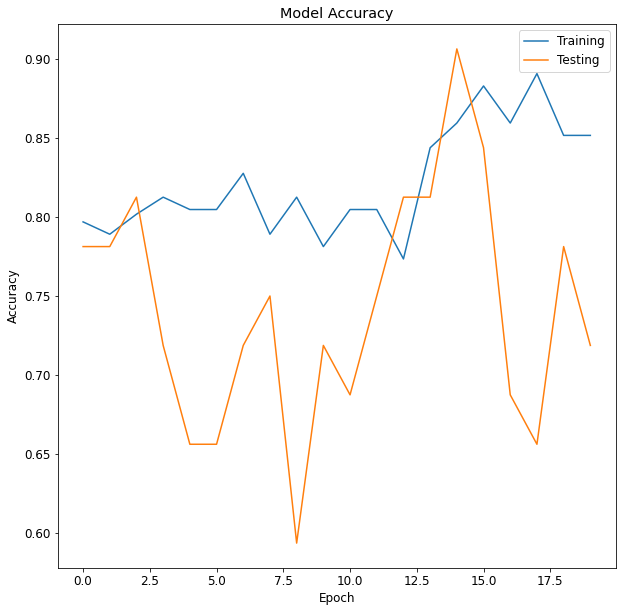

In [65]:
plt.figure(figsize=(10,10))

plt.plot(main.history['acc'])
plt.plot(main.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
#plt.savefig('chest_accuracy.png')
plt.show()
